<a href="https://colab.research.google.com/github/MbuyiseloNtando/Loan-Approval-Prediction/blob/main/loan_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Feature Descriptions**

* **person_age**: Applicant’s age in years.
* **person_income**: Annual income of the applicant in USD.
* **person_home_ownership**: Status of homeownership (e.g., Rent, Own, Mortgage).
* **person_emp_length**: Length of employment in years.
* **loan_intent**: Purpose of the loan (e.g., Education, Medical, Personal).
* **loan_grade**: Risk grade assigned to the loan, assessing the applicant’s creditworthiness.
* **loan_amnt**: Total loan amount requested by the applicant.
* **loan_int_rate**: Interest rate associated with the loan.
* **loan_status**: The approval status of the loan (approved or not approved).
* **loan_percent_income**: Percentage of the applicant’s income allocated towards loan repayment.
* **cb_person_default_on_file**: Indicates if the applicant has a history of default ('Y' for yes, 'N' for no).
* **cb_person_cred_hist_length**: Length of the applicant’s credit history in years.

**Objectives**
* Objective of this notebook if to examine factors affecting the loan approval status, perform EDA and build the loan approval predictive model.

In [ ]:
#import the dataframe
df = pd.read_csv('/content/credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
#exploring the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.isna().sum()/len(df)*100

,0
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,2.747000
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,9.563856
loan_status,0.000000
loan_percent_income,0.000000


There are only to features with missing values. `person_emp_length` has 2.8% while `loan_int_rate` has 9.6% missing values

---



In [ ]:
df.duplicated().sum()

165

In [ ]:
df.isna().sum()/len(df)*100

,0
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,2.747000
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,9.563856
loan_status,0.000000
loan_percent_income,0.000000


In [ ]:
df.dropna(axis=1, inplace=True)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.0,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.0,38500.00,55000.00,79200.00,6000000.00
loan_amnt,32581.0,9589.371106,6322.086646,500.0,5000.00,8000.00,12200.00,35000.00
loan_status,32581.0,0.218164,0.413006,0.0,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.0,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.0,3.00,4.00,8.00,30.00


In [ ]:
(df.groupby('loan_status').size()/df.shape[0]).round(4)

,0
loan_status,
0,0.7818
1,0.2182


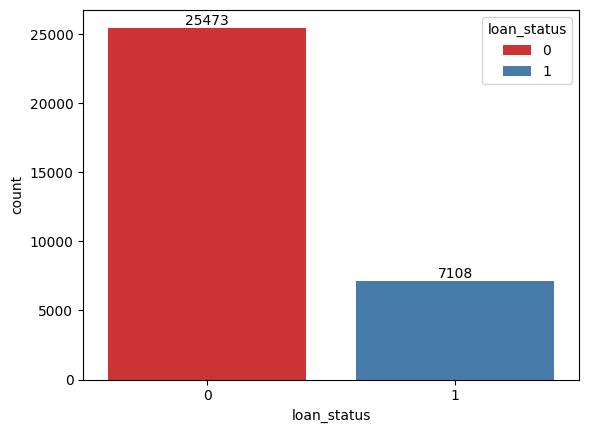

In [ ]:
ax = sns.countplot(x=('loan_status'), data=df, hue=('loan_status'),
              palette=('Set1') )
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

25472 which is 78% of `loan_status` data points are for Unapproved loan status, while the other 7108 which is 22% are for Approved loan status

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.0,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.0,38500.00,55000.00,79200.00,6000000.00
loan_amnt,32581.0,9589.371106,6322.086646,500.0,5000.00,8000.00,12200.00,35000.00
loan_status,32581.0,0.218164,0.413006,0.0,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.0,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.0,3.00,4.00,8.00,30.00


**Examining Catergorical features**

In [ ]:
data = df

In [ ]:
data['loan_intent'].value_counts()

,count
loan_intent,
EDUCATION,6453
MEDICAL,6071
VENTURE,5719
PERSONAL,5521
DEBTCONSOLIDATION,5212
HOMEIMPROVEMENT,3605


In [ ]:
df.groupby('loan_intent')['loan_status'].mean()

,loan_status
loan_intent,
DEBTCONSOLIDATION,0.285879
EDUCATION,0.172168
HOMEIMPROVEMENT,0.261026
MEDICAL,0.267007
PERSONAL,0.198877
VENTURE,0.148103


The average `loan_status` for each `loan_intent` shows significance difference. This feature can be included in our model

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['loan_intent']= label_encoder.fit_transform(data['loan_intent'])
data['loan_intent'].value_counts()

,count
loan_intent,
1,6453
3,6071
5,5719
4,5521
0,5212
2,3605


In [ ]:
df.groupby('loan_grade')['loan_status'].mean()

,loan_status
loan_grade,
A,0.099564
B,0.162760
C,0.207340
D,0.590458
E,0.644191
F,0.705394
G,0.984375


In [ ]:
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['loan_grade']= label_encoder.fit_transform(data['loan_grade'])
data['loan_grade'].value_counts()

,count
loan_grade,
0,10777
1,10451
2,6458
3,3626
4,964
5,241
6,64


In [ ]:
df.groupby(['cb_person_default_on_file'])['loan_status'].mean()

,loan_status
cb_person_default_on_file,
N,0.183932
Y,0.378068


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['cb_person_default_on_file']= label_encoder.fit_transform(data['cb_person_default_on_file'])
data['cb_person_default_on_file'].value_counts()

,count
cb_person_default_on_file,
0,26836
1,5745


In [ ]:
df.groupby(['person_home_ownership'])['loan_status'].mean()

,loan_status
person_home_ownership,
MORTGAGE,0.125707
OTHER,0.308411
OWN,0.074690
RENT,0.315700


In [ ]:
data['person_home_ownership']= label_encoder.fit_transform(data['person_home_ownership'])
data['person_home_ownership'].value_counts()

,count
person_home_ownership,
3,16446
0,13444
2,2584
1,107


In [ ]:
data.head()

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,4,3,35000,1,0.59,1,3
1,21,9600,2,1,1,1000,0,0.10,0,2
2,25,9600,0,3,2,5500,1,0.57,0,3
3,23,65500,3,3,2,35000,1,0.53,0,2
4,24,54400,3,3,2,35000,1,0.55,1,4


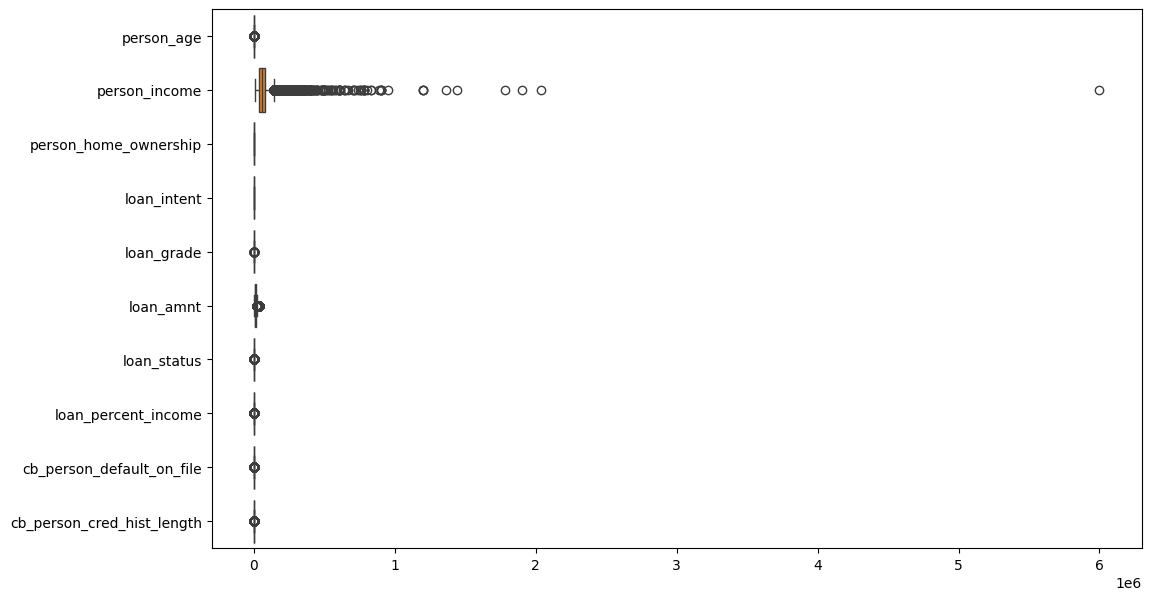

In [ ]:
plt.figure(figsize=(12,7))
ax = sns.boxplot(data, orient='h');

The `person_income` feature has a lot of outliers

In [ ]:
q1_unadj_produced = data["person_income"].quantile(0.25)
q2_unadj_produced = data["person_income"].quantile(0.75)
IQR_move = q2_unadj_produced - q1_unadj_produced
lower_bound = q1_unadj_produced - 1.5 * IQR_move
upper_bound = q2_unadj_produced + 1.5 * IQR_move

In [ ]:
#Dataframe with no outliers
no_outlier = data[(data['person_income']>=lower_bound) & (data['person_income']<=upper_bound)]

In [ ]:
#Dataframe with outlier person income
outlier_income = data[(data['person_income']>=upper_bound) | (data['person_income']<=lower_bound)]

In [ ]:
print(f'The percentage of data without outliers is {len(no_outlier)/len(data)*100:.2f}')
print(f'The percentage of data of outliers is {len(outlier_income)/len(data)*100:.2f}')

The percentage of data without outliers is 95.45
The percentage of data of outliers is 4.55


The percentage of data of outliers is 94.97, dropping datapoints with outliers wouldnt make sence since we would lose most of our data

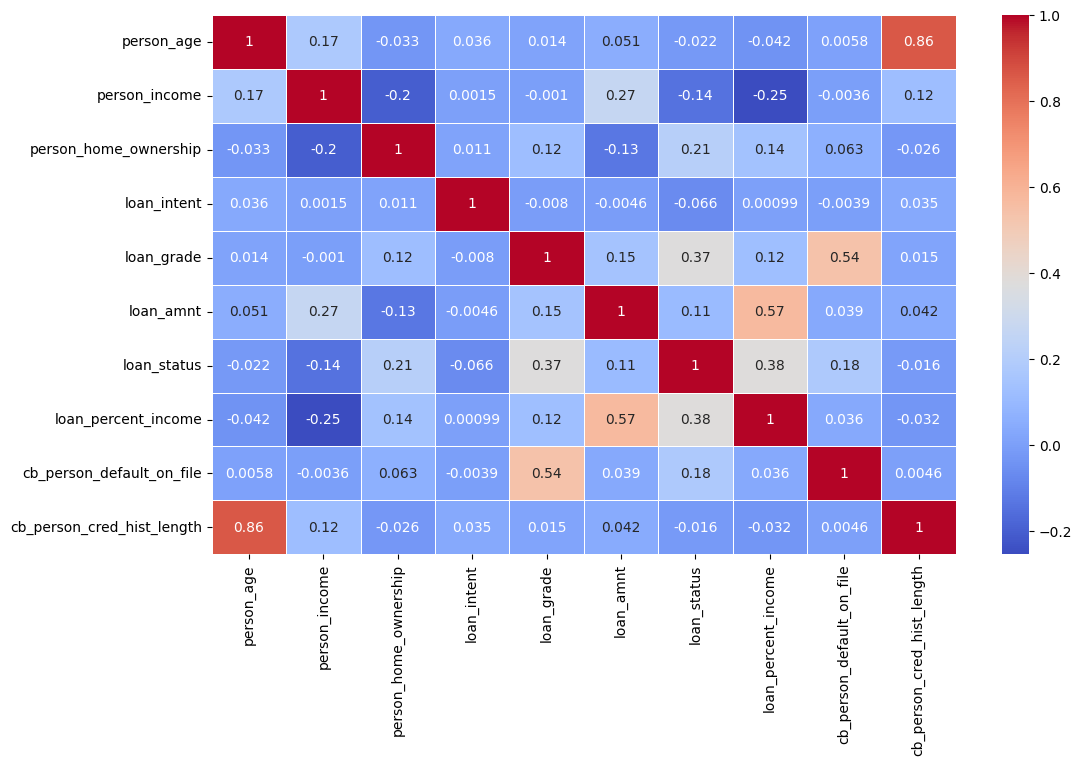

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), linewidths=0.5, annot=True, cmap='coolwarm');

In [ ]:
num = data.drop(['loan_status', 'person_age'], axis=1).columns
num

Index(['person_income', 'person_home_ownership', 'loan_intent', 'loan_grade',
       'loan_amnt', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

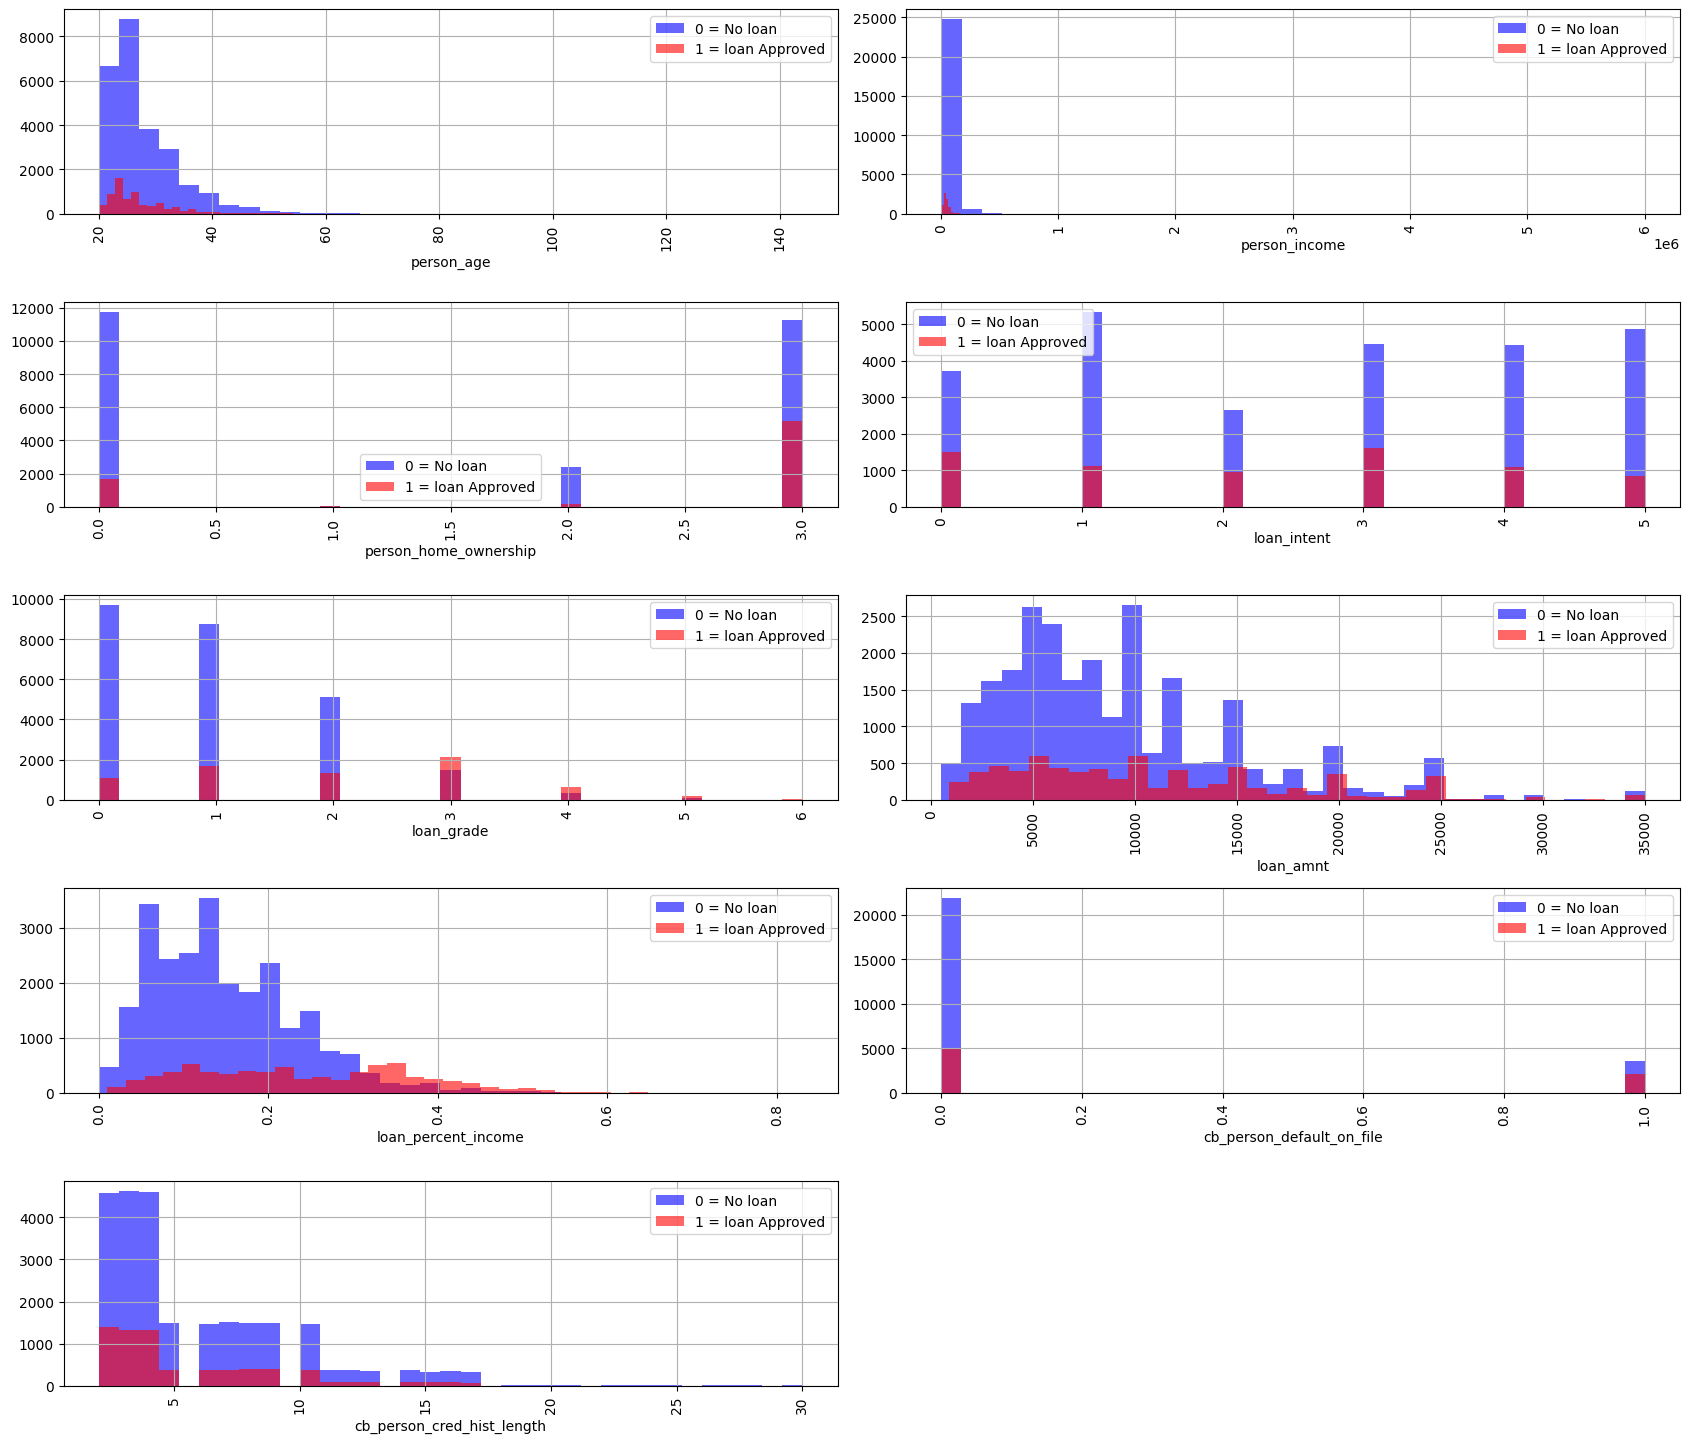

In [ ]:
plt.figure(figsize=(17, 17))
for i, col in enumerate(num, 1):
    plt.subplot(6, 2, i)
    #sns.boxplot(x='Claim', y=col, data=df)
    df[df["loan_status"] == 0][col].hist(bins=35, color='blue', label='0 = No loan', alpha=0.6)
    df[df["loan_status"] == 1][col].hist(bins=35, color='red', label='1 = loan Approved', alpha=0.6)
    plt.legend()
    plt.xlabel(col)
    plt.xticks(rotation=90)
plt.tight_layout();

# **Data processing and Model building**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
X = data.drop(['loan_status'], axis=1)
y = data['loan_status']

In [ ]:
#Scalling the exploritory variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 84.62%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.865566     0.726948  0.846186      0.796257      0.835449
recall         0.951228     0.467773  0.846186      0.709501      0.846186
f1-score       0.906378     0.569249  0.846186      0.737813      0.833129
support    20401.000000  5663.000000  0.846186  26064.000000  26064.000000
_______________________________________________
Confusion Matrix: 
 [[19406   995]
 [ 3014  2649]]

Test Result:
Accuracy Score: 83.66%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.855925     0.713964  0.836581     0.784944      0.824448
recall        0.949921     0.438754  0.836581     0.694338      0.836581
f1-score      0.900477     0.543506  0.836581     0.721991      0.821326
support    5072.00

In [ ]:
lr_clf.coef_

array([[ 0.01189835,  0.02714556,  0.395762  , -0.23787249,  1.02831188,
        -0.53155423,  1.24900645, -0.04129461, -0.00512929]])

In [ ]:
lr_clf.intercept_

array([-1.83596273])

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Assign `nb` to be the appropriate implementation of Naive Bayes.
nb = GaussianNB()

# Fit the model on your training data.
nb.fit(X_train, y_train)

# Apply your model to predict on your test data. Call this "y_pred".
y_pred=nb.predict(X_test)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 84.62%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.865566     0.726948  0.846186      0.796257      0.835449
recall         0.951228     0.467773  0.846186      0.709501      0.846186
f1-score       0.906378     0.569249  0.846186      0.737813      0.833129
support    20401.000000  5663.000000  0.846186  26064.000000  26064.000000
_______________________________________________
Confusion Matrix: 
 [[19406   995]
 [ 3014  2649]]

Test Result:
Accuracy Score: 83.66%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.855925     0.713964  0.836581     0.784944      0.824448
recall        0.949921     0.438754  0.836581     0.694338      0.836581
f1-score      0.900477     0.543506  0.836581     0.721991      0.821326
support    5072.00